# GENERATE DATA TO EXAMPLES

In [1]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import numpy as np
import tensorflow as tf
import os

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# 1. fetch_california_housing

In [2]:
data_X, data_y = fetch_california_housing(return_X_y=True, as_frame=True)

# joinn and rename dataset
data = data_X.copy()
data['Price'] = data_y
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.shape

(20640, 9)

In [4]:
# dropduplicates - some kind of plots in plotly return error with duplicated values
data = data.drop_duplicates()
data.shape

(20640, 9)

In [5]:
# save
data.to_pickle('df_california_housing.pkl')

# 2. Climate tempeture

In [6]:
# get data
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

# read data
data = pd.read_csv(csv_path)

# transform index into datetime format
index_datetime = pd.to_datetime(data.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

# set datetime as index
data.set_index(index_datetime, inplace =  True)

data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [7]:
# sample data - run codes faster - also some graphs use a lot of memory when used all the data
data = data[0:205000]
data.shape

(205000, 14)

In [8]:
#DELETE DUPLICATED VALUES - some kind of plots in plotly return error with duplicated values
data.shape

(205000, 14)

In [9]:
data = data.drop_duplicates()
data.shape

(204854, 14)

In [10]:
# save
data.to_pickle('data_weather.pkl')

# 3. Stock prices

In [11]:
#!pip install yfinance
import yfinance as yf

In [12]:
# examples
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
#hist = msft.history(period="1mo")
hist = msft.history(start = "2023-12-20", end = "2024-01-19")

hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-20 00:00:00-05:00,375.000000,376.029999,370.529999,370.619995,26316700,0.0,0.0
2023-12-21 00:00:00-05:00,372.559998,374.410004,370.040009,373.540009,17708000,0.0,0.0
2023-12-22 00:00:00-05:00,373.679993,375.179993,372.709991,374.579987,17091100,0.0,0.0
2023-12-26 00:00:00-05:00,375.000000,376.940002,373.500000,374.660004,12673100,0.0,0.0
2023-12-27 00:00:00-05:00,373.690002,375.059998,372.809998,374.070007,14905400,0.0,0.0


In [13]:
def get_close_data(ticket_stock, start_date, end_data):
    """
    get stock price        
    """
    obj_ticket = yf.Ticker(ticket_stock)
    data_close = obj_ticket.history(start = start_date, end = end_data)
    return data_close[["Close"]]

In [14]:
# examples
cmpc_stock_price = get_close_data(ticket_stock = "CMPC.SN", 
               start_date = "2024-01-01", 
               end_data = "2024-01-19"
              )

cmpc_stock_price

,Close
Date,
2024-01-02 00:00:00-03:00,1714.800293
2024-01-03 00:00:00-03:00,1683.202148
2024-01-04 00:00:00-03:00,1673.951172
2024-01-05 00:00:00-03:00,1679.900024
2024-01-08 00:00:00-03:00,1697.099976
2024-01-09 00:00:00-03:00,1709.000000
2024-01-10 00:00:00-03:00,1704.800049
2024-01-11 00:00:00-03:00,1685.000000
2024-01-12 00:00:00-03:00,1650.000000


In [15]:
# example get two year data
example_2years = get_close_data(ticket_stock = "CMPC.SN", 
               start_date = "2022-01-19", 
               end_data = "2024-01-19"
              )

#### run get data

In [16]:
# define list of stock to analyze
list_stocks_tickets = ["CMPC.SN", "CHILE.SN", "COPEC.SN", "ANDINA-B.SN",  # chile stocks
                       "MSFT", "AAPL", "GOOG", "TSLA", # eeuu stocks
                       "VOO", "QQQ" # eeuu index syp500, nazdaq100
                      ]

# get data close and join into one dataframe
output_df = pd.DataFrame()
for ticket_stock in list_stocks_tickets:
    aux_df = get_close_data(ticket_stock = "CMPC.SN", 
                            start_date = "2022-01-01", 
                            end_data = "2024-01-01" # 2 year data
                           )
    output_df[ticket_stock] = aux_df["Close"]

In [17]:
output_df

,CMPC.SN,CHILE.SN,COPEC.SN,ANDINA-B.SN,MSFT,AAPL,GOOG,TSLA,VOO,QQQ
Date,,,,,,,,,,
2022-01-03 00:00:00-03:00,1405.541748,1405.541748,1405.541748,1405.541748,1405.541748,1405.541748,1405.541748,1405.541748,1405.541748,1405.541748
2022-01-04 00:00:00-03:00,1357.653931,1357.653931,1357.653931,1357.653931,1357.653931,1357.653931,1357.653931,1357.653931,1357.653931,1357.653931
2022-01-05 00:00:00-03:00,1399.643311,1399.643311,1399.643311,1399.643311,1399.643311,1399.643311,1399.643311,1399.643311,1399.643311,1399.643311
2022-01-06 00:00:00-03:00,1429.635864,1429.635864,1429.635864,1429.635864,1429.635864,1429.635864,1429.635864,1429.635864,1429.635864,1429.635864
2022-01-07 00:00:00-03:00,1404.941895,1404.941895,1404.941895,1404.941895,1404.941895,1404.941895,1404.941895,1404.941895,1404.941895,1404.941895
...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-03:00,1654.903687,1654.903687,1654.903687,1654.903687,1654.903687,1654.903687,1654.903687,1654.903687,1654.903687,1654.903687
2023-12-26 00:00:00-03:00,1718.800049,1718.800049,1718.800049,1718.800049,1718.800049,1718.800049,1718.800049,1718.800049,1718.800049,1718.800049
2023-12-27 00:00:00-03:00,1699.901123,1699.901123,1699.901123,1699.901123,1699.901123,1699.901123,1699.901123,1699.901123,1699.901123,1699.901123


<Axes: >

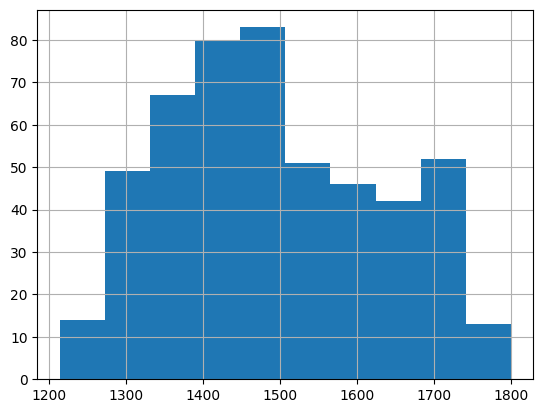

In [20]:
output_df["VOO"].hist()

In [21]:
output_df["VOO"].describe()

count     497.000000
mean     1491.443498
std       138.729385
min      1213.731567
25%      1384.829712
50%      1469.819214
75%      1600.206909
max      1799.680786
Name: VOO, dtype: float64

In [19]:
output_df.to_pickle('stock_prices.pkl')